In [353]:
%matplotlib qt

import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import cv2

Objective --> Reduce false positives - Image n.43 with 2 zones giving false positive

![Captura desde 2024-02-19 11-01-31.png](<attachment:Captura desde 2024-02-19 11-01-31.png>)
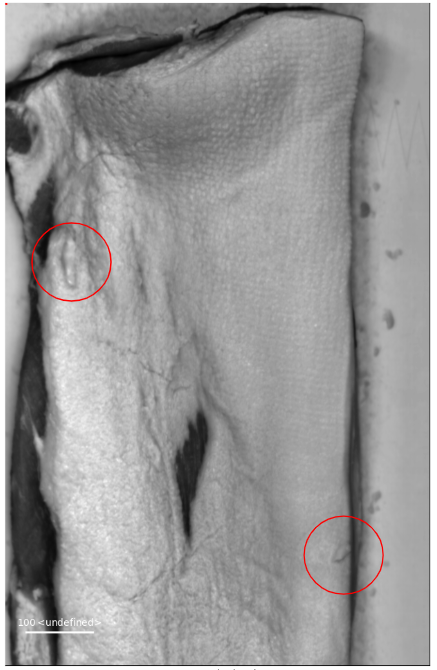

In [354]:
# Paths
# data_file_dir = "/media/ivan/Ivan/jad/images_3/normal/src_Specim-FX17e-076900055547_43.tiff"      # False Positive - Plastic NO
data_file_dir = "/media/ivan/Ivan/jad/images_4/plastic/src_Specim-FX17e-076900055547_01.tiff"     # Small plastic YES
# data_file_dir = "/media/ivan/Ivan/jad/images_4/plastic/src_Specim-FX17e-076900055547_04.tiff"       # Small plastic YES

In [355]:
example_image = []

_, example_image = cv2.imreadmulti(
    filename=data_file_dir,
    mats=example_image,
    flags=cv2.IMREAD_UNCHANGED
)

example_image = np.asarray(example_image)
example_image = np.transpose(example_image, (0, 2, 1))

Zones of interest for each image:
- Image 43(x,y) region1: (75,345), (124,345), (75,436), (124,436)
- Image 43(x,y) region2: (487,804), (532,804), (487,855), (532,855)
- Image 1(x,y): (181,560), (203,560), (181,584), (203,584) 
- Image 4(x,y): (101,294), (114,294), (101,311), (114,311)

In [356]:
# Lambdas
y1 = 4.737672888
y2 = 3.474012223

# Values Plastic, points 25 and 80
valuesplastic = [0.6172515, 0.45261446]

# Value point 154
value154 = 0.1302857995

# Points of interest
points_of_interest = [25,80]

In [357]:
# # Image 43

# # Region 1
# topleft = (75,345)
# topright = (124,345)
# bottomleft = (75,436)
# bottomright = (124,436)

# # Region 2
# topleft2 = (487,804)
# topright2 = (532,804)
# bottomleft2 = (487,855)
# bottomright2 = (532,855)

# mask = np.ones_like(example_image[:, :, 1])

# for row in range(topleft[1], bottomleft[1] + 1):
#     for col in range(topleft[0], topright[0] + 1):
#         signal = example_image[row,col,points_of_interest]
#         test = (1/2)*(pow((value154*y1-signal[0]), 2) + pow(value154*y2-signal[1], 2))
#         print(test)
#         if test < 0.000015:
#             mask[row,col] = 0

# for row in range(topleft2[1], bottomleft2[1] + 1):
#     for col in range(topleft2[0], topright2[0] + 1):
#         signal = example_image[row,col,points_of_interest]
#         test = (1/2)*(pow((value154*y1-signal[0]), 2) + pow(value154*y2-signal[1], 2))
#         print(test)
#         if test < 0.000015:
#             mask[row,col] = 0

# plt.imshow(mask)

In [358]:
# Image 1

topleft = (181,560)
topright = (203,560)
bottomleft = (181,584)
bottomright = (203,584)

mask = np.ones_like(example_image[:, :, 1])

for row in range(topleft[1], bottomleft[1] + 1):
    for col in range(topleft[0], topright[0] + 1):
        signal = example_image[row,col,points_of_interest]
        test = (1/4)*(pow((value154*y1-signal[0]), 2) + pow(value154*y2-signal[1], 2))
        print(test)
        if test < 0.000015:
            mask[row,col] = 0

plt.imshow(mask)

0.00019199921436006297
0.00019195070579357536
0.00027919143770883606
0.00032748951428580137
0.00035922870489686604
0.0004962291554758194
0.00037966233648209925
0.00032470674976859266
0.0003554563777879153
0.00020270295865802457
0.00015025091915696166
0.0003128756322910475
0.0003173244896336603
0.0003354721432599507
0.00026732626454249037
0.00019976212880183804
0.00011894522859936842
0.00015191847228420032
0.00021623233707719573
0.0002752728396557667
0.00024978023809052403
7.403270784660959e-05
8.530211151134675e-05
0.00012976341000796958
0.00014052097356245035
0.00024972678123573786
0.0004058323598581775
0.0004863148250947646
0.0006698300781863417
0.0005426467440547086
0.00038174184356048655
0.0002489191253244792
0.00010214869769046868
9.095722489961575e-05
0.00016066775482287244
0.00015598408797855664
0.0002356234383841474
0.00020456483767180065
0.00018072409164076263
0.00012218862183185604
0.00011822420713401868
0.00014452844001855715
0.00015980415871663574
0.00023535048646856885
0.0

In [359]:
# # Image 4

# topleft = (101,294) 
# topright = (114,294)
# bottomleft = (101,311)
# bottomright = (114,311)

# mask = np.ones_like(example_image[:, :, 1])

# for row in range(topleft[1], bottomleft[1] + 1):
#     for col in range(topleft[0], topright[0] + 1):
#         signal = example_image[row,col,points_of_interest]
#         test = (1/4)*(pow((value154*y1-signal[0]), 2) + pow(value154*y2-signal[1], 2))
#         print(test)
#         if test < 0.000015: # 0.000015 # 0.008
#             mask[row,col] = 0

# plt.imshow(mask)